In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bmi_data=pd.read_csv('data/bmi_lbs.csv')
bmi_data.head(3)

,Label,Gender,Height,Weight(lbs)
0,Obesity,Male,174,211.6416
1,Normal,Male,189,191.8002
2,Obesity,Female,185,242.5060


In [3]:
bmi_data.keys()

Index(['Label', 'Gender', 'Height', 'Weight(lbs)'], dtype='object')

In [4]:
bmi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        500 non-null    object 
 1   Gender       500 non-null    object 
 2   Height       500 non-null    int64  
 3   Weight(lbs)  500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [5]:
bmi_data.corr()

,Height,Weight(lbs)
Height,1.000000,0.000446
Weight(lbs),0.000446,1.000000


In [6]:
bmi_data.describe()

,Height,Weight(lbs)
count,500.000000,500.000000
mean,169.944000,233.687600
std,16.375261,71.390696
min,140.000000,110.230000
25%,156.000000,176.368000
50%,170.500000,233.687600
75%,184.000000,299.825600
max,199.000000,352.736000


In [7]:
bmi_data

,Label,Gender,Height,Weight(lbs)
0,Obesity,Male,174,211.6416
1,Normal,Male,189,191.8002
2,Obesity,Female,185,242.5060
3,Overweight,Female,195,229.2784
4,Overweight,Male,149,134.4806
...,...,...,...,...
495,Extreme Obesity,Female,150,337.3038
496,Obesity,Female,184,266.7566
497,Extreme Obesity,Female,141,299.8256
498,Extreme Obesity,Male,150,209.4370


In [19]:
c1=bmi_data['Height']
c1

0      174
1      189
2      185
3      195
4      149
      ... 
495    150
496    184
497    141
498    150
499    173
Name: Height, Length: 500, dtype: int64

In [20]:
c2=bmi_data['Weight(lbs)']
c2

0      211.6416
1      191.8002
2      242.5060
3      229.2784
4      134.4806
         ...   
495    337.3038
496    266.7566
497    299.8256
498    209.4370
499    288.8026
Name: Weight(lbs), Length: 500, dtype: float64

In [21]:
element=pd.concat([c1,c2],axis=1)
element

,Height,Weight(lbs)
0,174,211.6416
1,189,191.8002
2,185,242.5060
3,195,229.2784
4,149,134.4806
...,...,...
495,150,337.3038
496,184,266.7566
497,141,299.8256
498,150,209.4370


In [9]:
bmi_data['bmi']=(bmi_data['Weight(lbs)']*0.453592)/(bmi_data['Height']/100*bmi_data['Height']/100)
bmi_data

,Label,Gender,Height,Weight(lbs),bmi
0,Obesity,Male,174,211.6416,31.707933
1,Normal,Male,189,191.8002,24.355151
2,Obesity,Female,185,242.5060,32.139892
3,Overweight,Female,195,229.2784,27.350124
4,Overweight,Male,149,134.4806,27.475935
...,...,...,...,...,...
495,Extreme Obesity,Female,150,337.3038,67.999247
496,Obesity,Female,184,266.7566,35.739207
497,Extreme Obesity,Female,141,299.8256,68.406264
498,Extreme Obesity,Male,150,209.4370,42.221755


In [10]:
bmi_data.corr()

,Height,Weight(lbs),bmi
Height,1.000000,0.000446,-0.531999
Weight(lbs),0.000446,1.000000,0.827022
bmi,-0.531999,0.827022,1.000000


In [22]:
bmi_data.Label

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 500, dtype: object

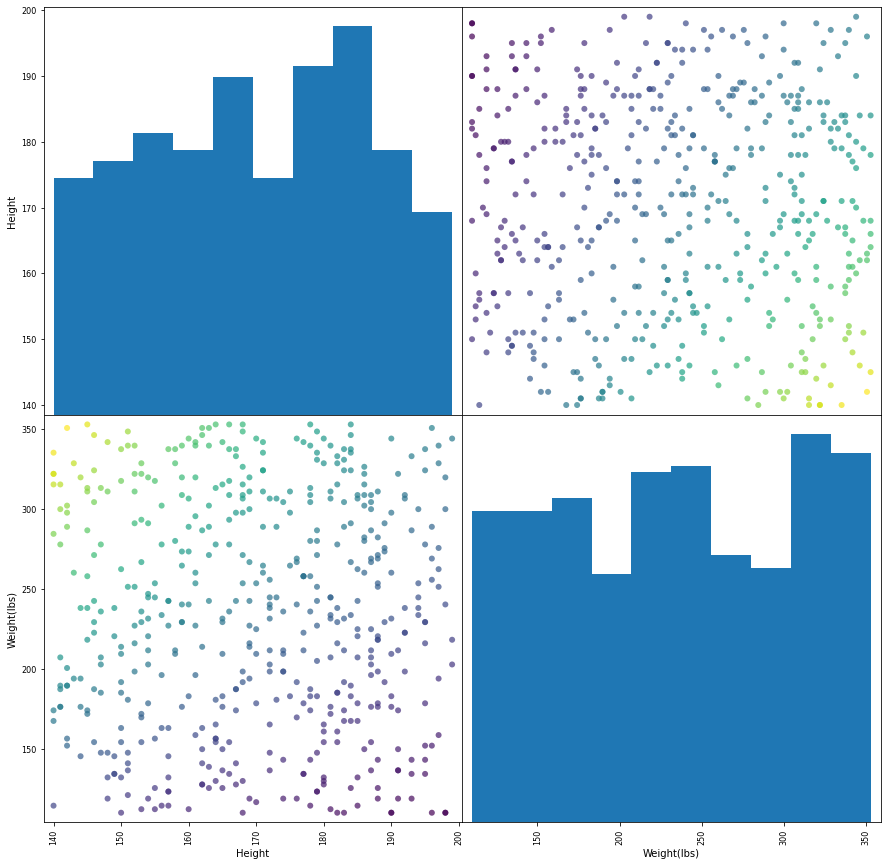

In [14]:
pd.plotting.scatter_matrix(bmi_data.drop('bmi',axis=1),
                          figsize=(15,15),
                          marker='o',
                          c = bmi_data.bmi,
                          alpha=0.7) # 투명도 설정

plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
from sklearn.model_selection import train_test_split

In [23]:
train_test_split(element,bmi_data.Label)

[     Height  Weight(lbs)
 104     192     308.6440
 109     149     145.5036
 159     181     231.4830
 461     152     291.0072
 5       189     229.2784
 ..      ...          ...
 367     186     279.9842
 333     172     136.6852
 27      187     136.6852
 260     159     229.2784
 203     182     229.2784
 
 [375 rows x 2 columns],
      Height  Weight(lbs)
 138     171     324.0762
 91      183     211.6416
 103     198     319.6670
 221     183     304.2348
 286     150     163.1404
 ..      ...          ...
 58      164     154.3220
 233     177     178.5726
 69      194     299.8256
 185     165     176.3680
 199     193     332.8946
 
 [125 rows x 2 columns],
 104            Obesity
 109         Overweight
 159            Obesity
 461    Extreme Obesity
 5           Overweight
             ...       
 367            Obesity
 333             Normal
 27                Weak
 260    Extreme Obesity
 203            Obesity
 Name: Label, Length: 375, dtype: object,
 138    Extreme 

In [24]:
X_train,X_test,y_train,y_test=train_test_split(element,bmi_data.Label)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 2)
(125, 2)
(375,)
(125,)


In [25]:
train_list=[]
test_list=[]
for k in range(1,100):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    
    train_score=model.score(X_train,y_train)
    train_list.append(train_score)
    
    test_score=model.score(X_test,y_test)
    test_list.append(test_score)

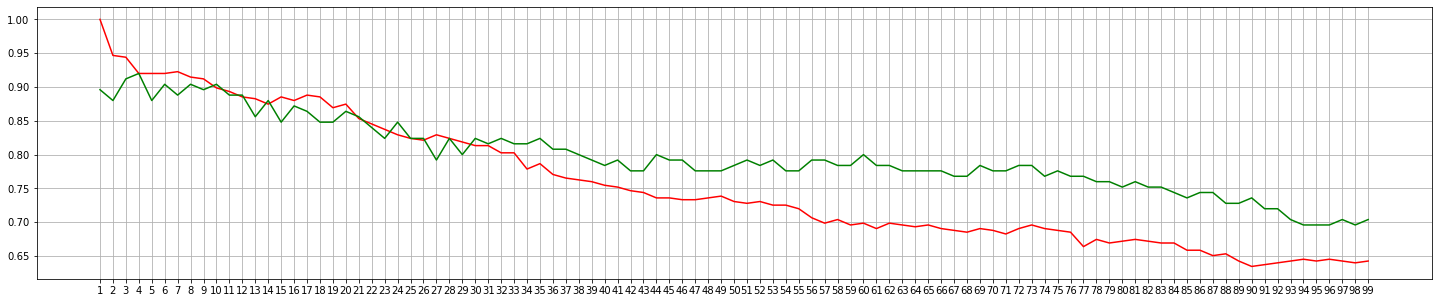

In [26]:
plt.figure(figsize=(25,5))
plt.plot(range(1,100),train_list,c='red')
plt.plot(range(1,100),test_list,c='green')
plt.xticks(range(1,100))
plt.grid()
plt.show()

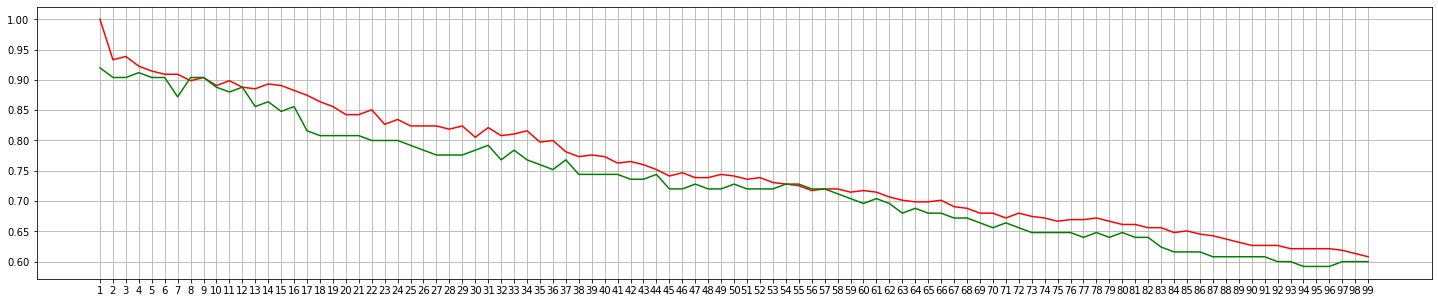

In [27]:
train_test_split(element,bmi_data.Label)
X_train,X_test,y_train,y_test=train_test_split(element,bmi_data.Label)
train_list=[]
test_list=[]
for k in range(1,100):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    
    train_score=model.score(X_train,y_train)
    train_list.append(train_score)
    
    test_score=model.score(X_test,y_test)
    test_list.append(test_score)
plt.figure(figsize=(25,5))
plt.plot(range(1,100),train_list,c='red')
plt.plot(range(1,100),test_list,c='green')
plt.xticks(range(1,100))
plt.grid()
plt.show()

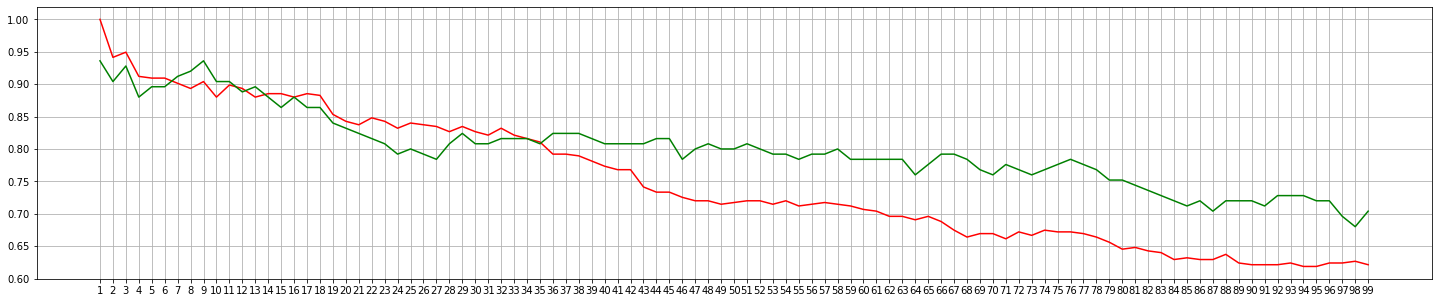

In [28]:
train_test_split(element,bmi_data.Label)
X_train,X_test,y_train,y_test=train_test_split(element,bmi_data.Label)
train_list=[]
test_list=[]
for k in range(1,100):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    
    train_score=model.score(X_train,y_train)
    train_list.append(train_score)
    
    test_score=model.score(X_test,y_test)
    test_list.append(test_score)
plt.figure(figsize=(25,5))
plt.plot(range(1,100),train_list,c='red')
plt.plot(range(1,100),test_list,c='green')
plt.xticks(range(1,100))
plt.grid()
plt.show()

In [29]:
final_model=KNeighborsClassifier(n_neighbors=6)
final_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [30]:
final_model.score(X_test,y_test)

0.896

In [31]:
pre=model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(pre,y_test))

                 precision    recall  f1-score   support

Extreme Obesity       0.88      0.85      0.86        52
 Extremely Weak       0.00      0.00      0.00         0
         Normal       0.87      0.50      0.63        26
        Obesity       0.66      0.69      0.68        39
     Overweight       0.33      0.50      0.40         8
           Weak       0.00      0.00      0.00         0

       accuracy                           0.70       125
      macro avg       0.46      0.42      0.43       125
   weighted avg       0.77      0.70      0.73       125



C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
final_model=KNeighborsClassifier(n_neighbors=9)
final_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [36]:
final_model.score(X_test,y_test)

0.936

In [37]:
pre=model.predict(X_test)

In [38]:
print(classification_report(pre,y_test))

                 precision    recall  f1-score   support

Extreme Obesity       0.88      0.85      0.86        52
 Extremely Weak       0.00      0.00      0.00         0
         Normal       0.87      0.50      0.63        26
        Obesity       0.66      0.69      0.68        39
     Overweight       0.33      0.50      0.40         8
           Weak       0.00      0.00      0.00         0

       accuracy                           0.70       125
      macro avg       0.46      0.42      0.43       125
   weighted avg       0.77      0.70      0.73       125



C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
final_model=KNeighborsClassifier(n_neighbors=3)
final_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
final_model.score(X_test,y_test)

0.928

In [41]:
pre=model.predict(X_test)
print(classification_report(pre,y_test))

                 precision    recall  f1-score   support

Extreme Obesity       0.88      0.85      0.86        52
 Extremely Weak       0.00      0.00      0.00         0
         Normal       0.87      0.50      0.63        26
        Obesity       0.66      0.69      0.68        39
     Overweight       0.33      0.50      0.40         8
           Weak       0.00      0.00      0.00         0

       accuracy                           0.70       125
      macro avg       0.46      0.42      0.43       125
   weighted avg       0.77      0.70      0.73       125



C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
final_model=KNeighborsClassifier(n_neighbors=5)
final_model.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
final_model.score(X_test,y_test)

0.896

In [45]:
pre=model.predict(X_test)
print(classification_report(pre,y_test))

                 precision    recall  f1-score   support

Extreme Obesity       0.88      0.85      0.86        52
 Extremely Weak       0.00      0.00      0.00         0
         Normal       0.87      0.50      0.63        26
        Obesity       0.66      0.69      0.68        39
     Overweight       0.33      0.50      0.40         8
           Weak       0.00      0.00      0.00         0

       accuracy                           0.70       125
      macro avg       0.46      0.42      0.43       125
   weighted avg       0.77      0.70      0.73       125



C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
